In [211]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

In [213]:
dimensions = 3
max_p = 6
incoming_edges = 3

In [214]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [215]:
_, graphs, times, bics = pc_incremental_extensive(partial_corr_test, ts, 0.05, 20, verbose=True, patiency=5)

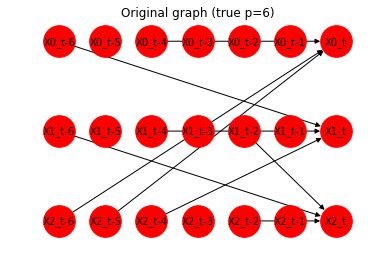

In [216]:
plt.title('Original graph (true p=6)')
generator.draw_graph()

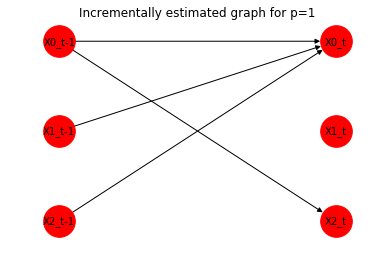

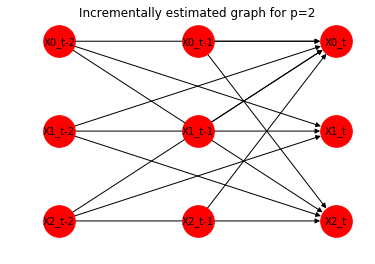

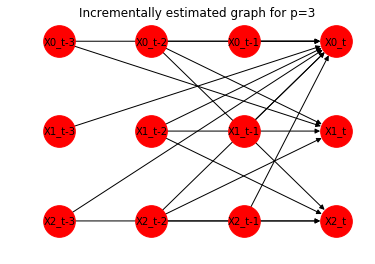

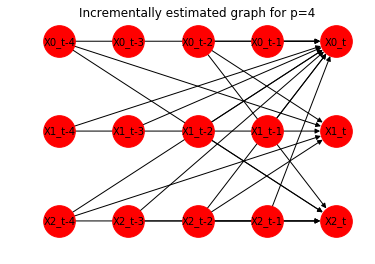

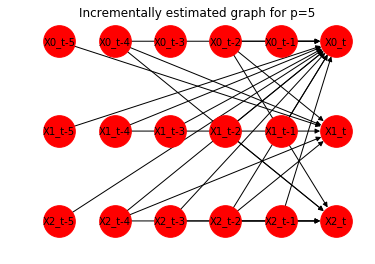

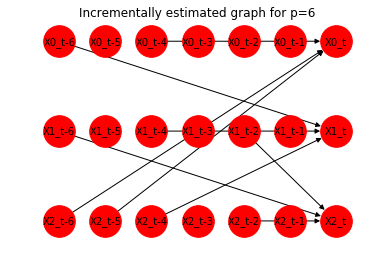

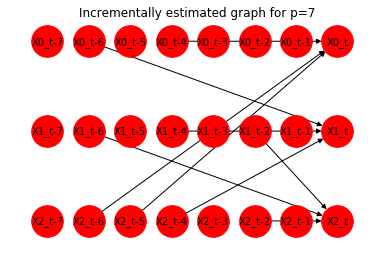

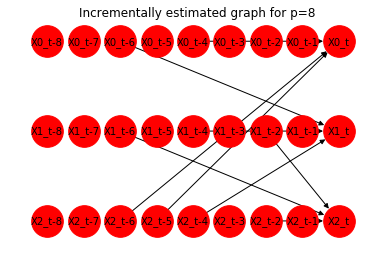

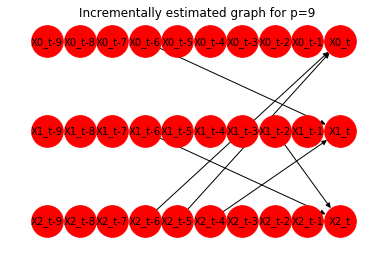

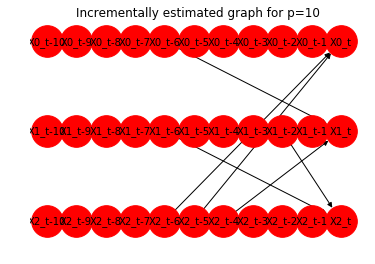

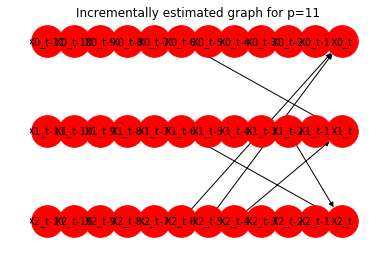

In [217]:
for p, g in graphs.items():   
    plt.title("Incrementally estimated graph for p="+str(p))
    draw_graph(g, dimensions, p)

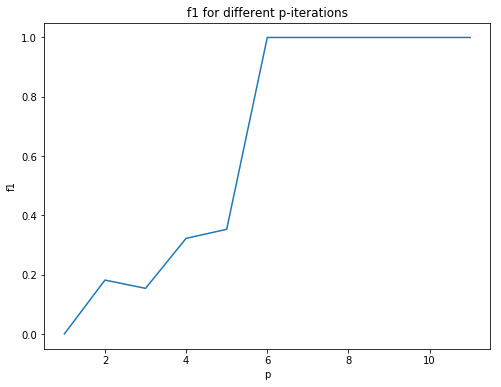

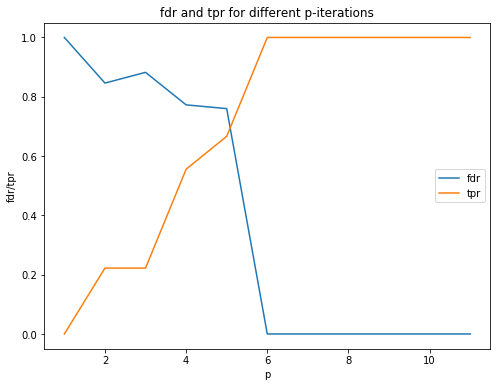

In [218]:
ps = []
f1 = []
fdr = []
tpr = []
for p, g in graphs.items():
    ps.append(p)
    f1.append(evaluate_edges(generator.graph, g)['f1-score'])
    fdr.append(evaluate_edges(generator.graph, g)['FDR'])
    tpr.append(evaluate_edges(generator.graph, g)['TPR'])

plt.figure(figsize=(8,6))
plt.title('f1 for different p-iterations')
plt.xlabel('p')
plt.ylabel('f1')
plt.plot(ps, f1)
plt.show()

plt.figure(figsize=(8,6))
plt.title('fdr and tpr for different p-iterations')
plt.xlabel('p')
plt.ylabel('fdr/tpr')
plt.plot(ps, fdr, label='fdr')
plt.plot(ps, tpr, label='tpr')
plt.legend()
plt.show()

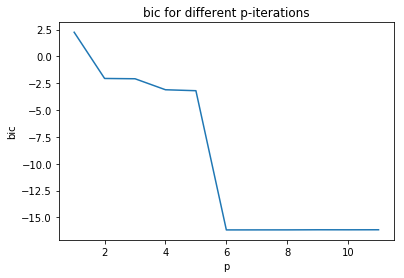

In [219]:
plt.title('bic for different p-iterations')
plt.xlabel('p')
plt.ylabel('bic')
plt.plot(list(bics.keys()), list(bics.values()))
plt.show()

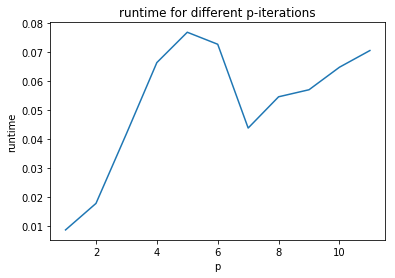

In [220]:
plt.title('runtime for different p-iterations')
plt.xlabel('p')
plt.ylabel('runtime')
plt.plot(list(times.keys()), list(times.values()))
plt.show()

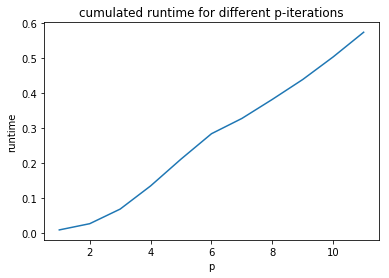

In [221]:
plt.title('cumulated runtime for different p-iterations')
plt.xlabel('p')
plt.ylabel('runtime')
plt.plot(list(times.keys()), np.cumsum(list(times.values())))
plt.show()

2.247281578292562
25
-2.0708115368144235
34
-2.1048962783578826
38
-3.1368313122611937
43
-3.231332626747842
46
-16.191571029021663
30
-16.19187369448125
33
-16.19319990067023
36
-16.186914733724084
39
-16.191790095418398
42
-16.19126840846326
45


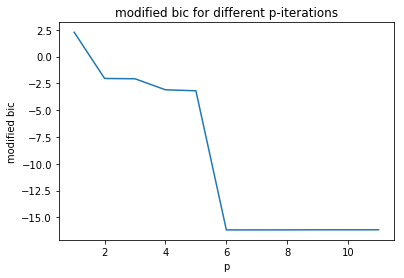

{1: 2.270309482000372, 2: -2.039490795469445, 3: -2.0698876225186558, 4: -3.097212721569511, 5: -3.188946168382761, 6: -16.163925220961115, 7: -16.16146059289149, 8: -16.16001901177261, 9: -16.150965563600714, 10: -16.153072150012093, 11: -16.14978119357749}


In [222]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    print(model._log_likelihood())
    print(free_params)
    modified_bic[p] = model.information_criterion('bic', free_params=free_params)
plt.title('modified bic for different p-iterations')
plt.ylabel('modified bic')
plt.xlabel('p')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()
print(modified_bic)

2.247281578292562
25
-2.0708115368144235
34
-2.1048962783578826
38
-3.1368313122611937
43
-3.231332626747842
46
-16.191571029021663
30
-16.19187369448125
33
-16.19319990067023
36
-16.186914733724084
39
-16.191790095418398
42
-16.19126840846326
45


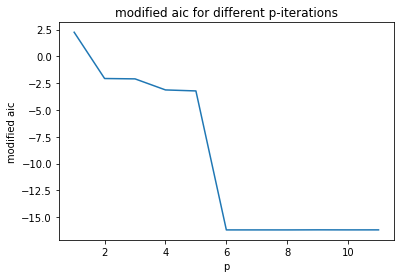

{1: 2.2522820783425668, 2: -2.0640101765423693, 3: -2.0972939976736775, 4: -3.128227870884643, 5: -3.2221280244466914, 6: -16.185567426860366, 7: -16.185269071244985, 8: -16.18599413605854, 9: -16.179107707400394, 10: -16.18338168700999, 11: -16.182258497561268}


In [223]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    print(model._log_likelihood())
    print(free_params)
    modified_bic[p] = model.information_criterion('aic', free_params=free_params)
plt.title('modified aic for different p-iterations')
plt.ylabel('modified aic')
plt.xlabel('p')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()
print(modified_bic)

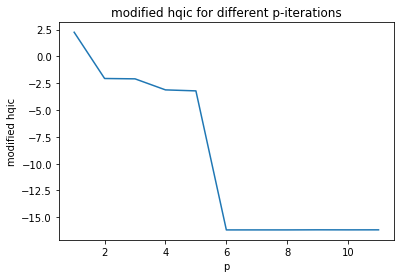

chosen with patiency 1: 6
chosen: 6


In [224]:
modified_bic = {}
for p, g in graphs.items():
    model = VAR(p)
    mapping, matrix = transform_ts(ts, p)
    model.fit_from_graph(3, matrix, g, mapping)
    free_params = len(g.nodes())+len(g.edges())
    modified_bic[p] = model.information_criterion('hqic', free_params=free_params)
plt.title('modified hqic for different p-iterations')
plt.ylabel('modified hqic')
plt.xlabel('p')
plt.plot(list(modified_bic.keys()), list(modified_bic.values()))
plt.show()
print('chosen with patiency 1: ' + str((np.diff(np.array(list(modified_bic.values()))) > 0).argmax() + 1))
print('chosen: ' + str(np.array(list(modified_bic.values())).argmin() + 1 ))